<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch10_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**: By performing **Principal Component Analysis**, we aim to reduce the number of features by finding Components before applying a classification model.

**Apply** Principal Component Analysis (PCA) to the following dataset:

https://github.com/amrahmani/ML/blob/main/mobile_data.csv

**Select** the appropriate number of components.

**Reapply** PCA with the appropriate number of components to reduce dimensionality.

**Use** a Random Forest classifier to classify the data based on the this variable "price_range" (which has four classes).

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
y = df['price_range']

# Standardize the data (optional but recommended for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # This transforms X to have zero mean and unit variance

# Define the PCA object
pca = PCA(n_components=None)  # Set n_components to None to retain all components initially

# Perform PCA
pca.fit(X_scaled)

# Explained variance ratio (helps decide the number of components to keep)
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio for each component along with the associated feature contributions
print("Explained Variance Ratio and Feature Contributions:")

# Get feature names
features = X.columns

for i, ev in enumerate(explained_variance):
    print(f"\nComponent {i+1}: Explained Variance = {ev:.4f}")
    print("Feature contributions:")
    # Retrieve the components (loadings) for this principal component
    component_loadings = pca.components_[i]

    # Zip the feature names with their corresponding loadings and print them
    for feature, loading in zip(features, component_loadings):
        print(f" - {feature}: {loading:.4f}")


Explained Variance Ratio and Feature Contributions:

Component 1: Explained Variance = 0.1519
Feature contributions:
 - battery_power: 0.0050
 - clock_speed: -0.0368
 - dual_sim: -0.0081
 - int_memory: 0.0000
 - n_cores: 0.0233
 - px_height: 0.7032
 - px_width: 0.6998
 - ram: -0.0197
 - touch_screen: 0.0310
 - wifi: 0.1118

Component 2: Explained Variance = 0.1092
Feature contributions:
 - battery_power: -0.1469
 - clock_speed: -0.1302
 - dual_sim: 0.4819
 - int_memory: 0.3317
 - n_cores: -0.2815
 - px_height: -0.0197
 - px_width: 0.0152
 - ram: 0.5304
 - touch_screen: -0.4141
 - wifi: 0.2942

Component 3: Explained Variance = 0.1059
Feature contributions:
 - battery_power: 0.5924
 - clock_speed: 0.1789
 - dual_sim: -0.3825
 - int_memory: 0.3907
 - n_cores: -0.4347
 - px_height: 0.0620
 - px_width: -0.0028
 - ram: -0.0308
 - touch_screen: -0.2891
 - wifi: -0.2020

Component 4: Explained Variance = 0.1011
Feature contributions:
 - battery_power: -0.1573
 - clock_speed: 0.8310
 - dual_si

**Select** the appropriate number of components, based on explained variance (e.g., keep components explaining > 80% of the variance).

A higher ratio means the component captures more important information.

In [2]:
import numpy as np

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Set a threshold (e.g., 80%)
threshold = 0.80

# Find the index of the first component that exceeds the threshold
n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print("Number of components to keep:", n_components)

Number of components to keep: 8


**Reapply** PCA with the appropriate number of components to reduce dimensionality (X_reduced)

In [3]:
# n_components = 8

# Create a new PCA object with the chosen number of components
pca = PCA(n_components=n_components)

# Transform the data using the chosen number of components
X_reduced = pca.fit_transform(X_scaled)

# Now X_reduced contains the data projected onto the chosen number of principal components

**Use** a Random Forest classifier for further analysis with X_reduced and y (e.g., for classification or regression)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Choose a classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.60      0.60      0.60        91
           2       0.58      0.60      0.59        92
           3       0.82      0.77      0.79       112

    accuracy                           0.71       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.71      0.71       400

Confusion Matrix:
 [[88 17  0  0]
 [19 55 15  2]
 [ 1 19 55 17]
 [ 0  1 25 86]]
Accuracy Score: 0.71


**Problem 2:** By applying **Factor Analysis**, we aim to reduce the number of features by finding common underlying factors before applying a regression model.

**Perform** Factor Analysis on the following dataset:

https://github.com/amrahmani/ML/blob/main/mobile_data.csv

**Interpret** the factors to find the appropriate number of common underlying factors.

In [8]:
!pip install factor_analyzer

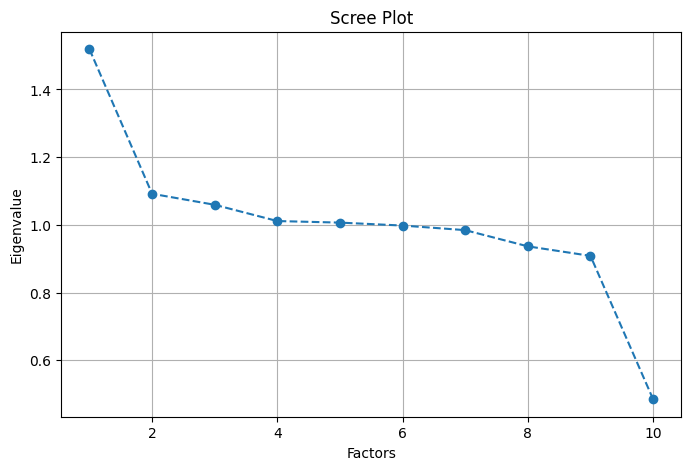

Factor Loadings:
                 Factor1   Factor2   Factor3
battery_power  0.014005 -0.143952  0.087426
clock_speed   -0.014796 -0.038828  0.003463
dual_sim      -0.019225  0.267661  0.039509
int_memory     0.007409 -0.014122  0.165010
n_cores        0.001384  0.017506 -0.168556
px_height      0.997575 -0.012821  0.009041
px_width       0.513269  0.104823 -0.050079
ram           -0.016886  0.136288  0.122743
touch_screen   0.016779 -0.047403 -0.150719
wifi           0.051372  0.087785  0.027585


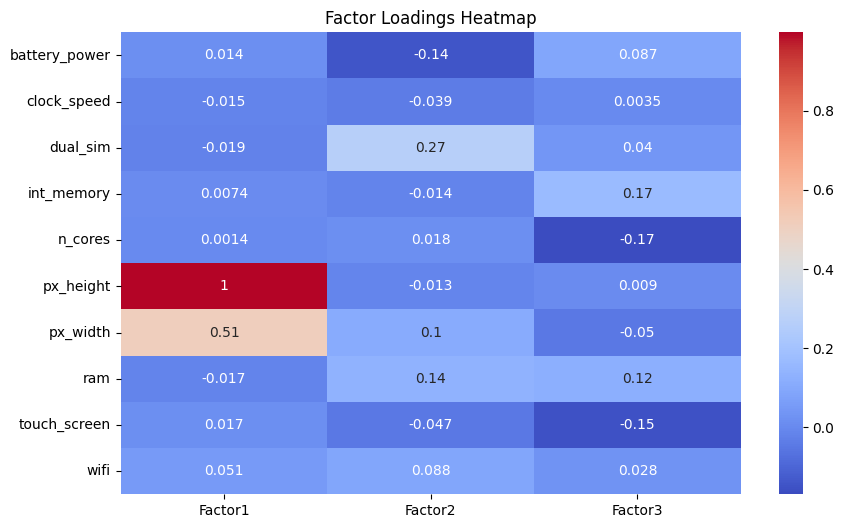

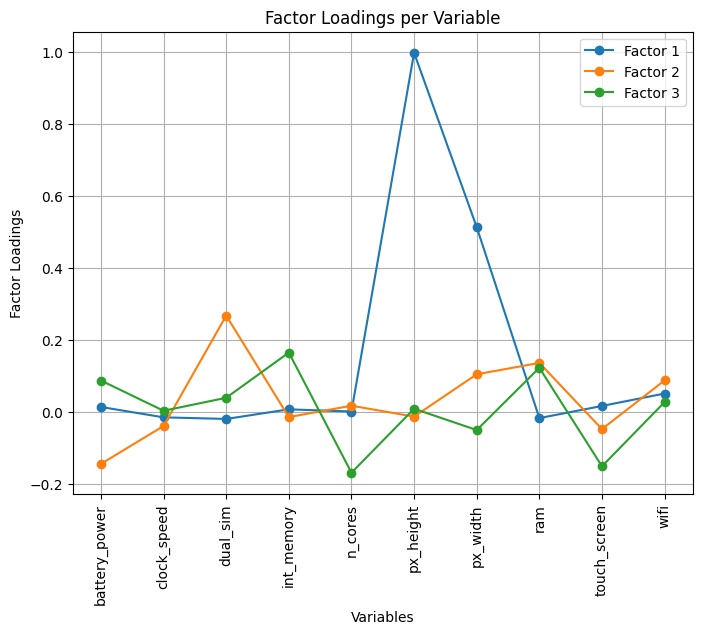

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/mobile_data.csv'
df = pd.read_csv(url)

# Define features and target
X = df[['battery_power', 'clock_speed', 'dual_sim', 'int_memory', 'n_cores', 'px_height', 'px_width', 'ram', 'touch_screen', 'wifi']]
y = df['price_range']

# Step 1: Data Preparation
# Standardizing the data for factor analysis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Conduct Factor Analysis
# Performing factor analysis using the factor_analyzer package
# Choose the number of factors based on eigenvalues greater than 1
# Rotation for Better Interpretability (Varimax Rotation used)
fa = FactorAnalyzer(n_factors=3, rotation='varimax')  # Choosing 3 factors as an example
fa.fit(X_scaled)

# Step 3: Check eigenvalues to determine the number of factors
ev, v = fa.get_eigenvalues()

# Plotting the scree plot to visualize the eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev) + 1), ev, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Step 4: Factor Loading Interpretation
# Get the factor loadings and analyze
factor_loadings = fa.loadings_

# Create a DataFrame for better interpretation
loading_df = pd.DataFrame(factor_loadings, index=X.columns, columns=['Factor1', 'Factor2', 'Factor3'])

# Print the factor loadings
print("Factor Loadings:\n", loading_df)

# Step 5: Interpretation of Factor Loadings
# Factors influencing mobile price range can be identified by looking at the high loadings in each factor
# Example interpretation:
# Variables with high loadings (close to 1 or -1) on a factor strongly influence that factor.

# Step 6: Visualization of Factors
# Heatmap of factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loading_df, annot=True, cmap='coolwarm')
plt.title('Factor Loadings Heatmap')
plt.show()

# Optional: Visualizing variables contributing to each factor
plt.figure(figsize=(8, 6))
for i in range(loading_df.shape[1]):
    plt.plot(loading_df.iloc[:, i], label=f'Factor {i+1}', marker='o')

plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.title('Factor Loadings per Variable')
plt.xlabel('Variables')
plt.ylabel('Factor Loadings')
plt.legend()
plt.grid(True)
plt.show()


**Reduce** dimensionality of original data to (X_factors)

In [12]:
# Transform the original data into factor scores
X_factors = fa.transform(X_scaled)

**Use** a Logistic Regression for further analysis with X_factors and y (e.g., for classification or regression)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.2, random_state=42)

# Logistic Regression using factor scores
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression on factor scores:", accuracy)


Accuracy of Logistic Regression on factor scores: 0.325


**Practice:**

**Task 1:** Apply PCA to the weather data from the provided URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset


**Task 2:** Apply Factor Analysis to the weather data from the provided URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset


**Task 3:** Find a suitable dataset with numerous features on Kaggle. Apply PCA and Factor Analysis to it, then use the resulting data for both regression and classification tasks. Finally, compare the performance of the models trained on the original data and the data processed using PCA and Factor Analysis.